## Predict historical prices of Brent Oil, Crude Oil WTI, Natural Gas, Heating Oil from 2000-2022 with Fedot.Industrial

Dataset published on Kaggle3 consists of historical prices of Brent Oil, CrudeOil WTI, Natural Gas, and Heating Oil from 2000 to 2022. This sample of DailyOilGasPrices was created by using 30 consecutive business days of **Crude Oil WTI close prices** and **traded volumes** as **predictors** and the **average natural gas close** price during each 30-day time frame as the **target** variable. The final dataset has 191 2-dimensional time series of length 30, of which 70% were randomly sampled as training data and the remaining 30% as testing data. This type of model could help companies and governments to better analyse and predict economic situations and correlations regarding oil and natural gas.
Link to the dataset - https://www.kaggl.com/datasets/prasertk/historical-daily-oil-and-natural-gas-prices

In [1]:
from fedot_ind.core.repository.config_repository import DEFAULT_COMPUTE_CONFIG, DEFAULT_REG_AUTOML_CONFIG, DEFAULT_AUTOML_LEARNING_CONFIG

API_CONFIG = {'industrial_config': {'problem': 'regression'},
              'automl_config': DEFAULT_REG_AUTOML_CONFIG,
              'learning_config': {'learning_strategy': 'from_scratch',
                                  'learning_strategy_params': DEFAULT_AUTOML_LEARNING_CONFIG,
                                  'optimisation_loss': {'quality_loss': 'rmse'}},
              'compute_config': DEFAULT_COMPUTE_CONFIG}
METRIC_NAMES = ('r2', 'rmse', 'mae')
DATASET_NAME = 'DailyOilGasPrices'

In [2]:
from fedot_ind.core.architecture.pipelines.abstract_pipeline import ApiTemplate
api_client = ApiTemplate(api_config=API_CONFIG,
                         metric_list=METRIC_NAMES)

2025-01-23 02:17:45,389 - PyTorch version 2.2.2 available.


Next steps are quite straightforward. We need to fit the model and then predict the values for the test data just like for any other model in sklearn.

At the `fit` stage FedotIndustrial will transform initial time series data into features dataframe and will train regression model.

In [3]:
result_dict = api_client.eval(dataset=DATASET_NAME, finetune=False)

2025-01-23 02:18:09,662 - Reading data from /Users/lopatenko/Desktop/dev/Fedot.Industrial/fedot_ind/data/DailyOilGasPrices
2025-01-23 02:18:09,685 - Data read successfully from local folder
2025-01-23 02:18:09,692 - --------------------------------------------------
2025-01-23 02:18:09,693 - Initialising Industrial Repository
2025-01-23 02:18:09,693 - -------------------------------------------------
2025-01-23 02:18:09,693 - Initialising Industrial Evolutionary Optimisation params
2025-01-23 02:18:09,718 - --------------------------------------------------
2025-01-23 02:18:09,718 - Initialising Dask Server
Creating Dask Server
2025-01-23 02:18:09,735 - To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
2025-01-23 02:18:09,738 - State start
2025-01-23 02:18:09,743 -   Scheduler at: inproc://192.168.1.71/24453/1
2025-01-23 02:18:09,743 -   dashboard at:  http://192.168.1.71:56083/status
2025-01-23 02:18:09,744 - Reg

Generations:   0%|          | 0/10000 [00:00<?, ?gen/s]

Features of basis of <class 'numpy.ndarray'> type are loaded from cache in 0.00029 sec
2025-01-23 02:18:39,517 - IndustrialDispatcher - 4 individuals out of 5 in previous population were evaluated successfully.
2025-01-23 02:19:28,369 - IndustrialDispatcher - 6 individuals out of 7 in previous population were evaluated successfully.
2025-01-23 02:19:30,294 - IndustrialEvoOptimizer - Successful reproduction
2025-01-23 02:20:06,878 - IndustrialDispatcher - 9 individuals out of 10 in previous population were evaluated successfully.


Generations:   0%|          | 1/10000 [01:51<309:03:56, 111.27s/gen]

Features of basis of <class 'numpy.ndarray'> type are loaded from cache in 0.00266 sec
Features of basis of <class 'numpy.ndarray'> type are loaded from cache in 0.00166 sec
2025-01-23 02:20:50,269 - IndustrialDispatcher - 11 individuals out of 12 in previous population were evaluated successfully.
2025-01-23 02:21:44,154 - IndustrialDispatcher - 3 individuals out of 4 in previous population were evaluated successfully.
2025-01-23 02:21:44,159 - IndustrialEvoOptimizer - Successful reproduction


Generations:   0%|          | 2/10000 [03:28<286:11:44, 103.05s/gen]

Features of basis of <class 'numpy.ndarray'> type are loaded from cache in 0.00315 sec
Features of basis of <class 'numpy.ndarray'> type are loaded from cache in 0.00056 sec
Features of basis of <class 'numpy.ndarray'> type are loaded from cache in 0.00686 sec
Features of basis of <class 'numpy.ndarray'> type are loaded from cache in 0.00083 sec
Features of basis of <class 'numpy.ndarray'> type are loaded from cache in 0.00656 sec
Features of basis of <class 'numpy.ndarray'> type are loaded from cache in 0.00902 sec
2025-01-23 02:23:06,141 - IndustrialDispatcher - 15 individuals out of 19 in previous population were evaluated successfully.
2025-01-23 02:24:48,258 - IndustrialDispatcher - 5 individuals out of 6 in previous population were evaluated successfully.
2025-01-23 02:24:48,260 - IndustrialEvoOptimizer - Successful reproduction


  0%|          | 0/1 [00:00<?, ?it/s]

Features of basis of <class 'numpy.ndarray'> type are loaded from cache in 0.00271 sec



100%|██████████| 1/1 [00:02<00:00,  2.23s/it]


Epoch: 1, RMSE= 4.369555950164795, Training Loss: 4.37



100%|██████████| 1/1 [00:01<00:00,  1.86s/it]


Epoch: 2, RMSE= 5.053946495056152, Training Loss: 5.05
EarlyStopping counter: 1 out of 15



100%|██████████| 1/1 [00:02<00:00,  2.35s/it]


Epoch: 3, RMSE= 5.114271640777588, Training Loss: 5.11
EarlyStopping counter: 2 out of 15



100%|██████████| 1/1 [00:01<00:00,  1.13s/it]


Epoch: 4, RMSE= 4.858184337615967, Training Loss: 4.86
EarlyStopping counter: 3 out of 15



100%|██████████| 1/1 [00:01<00:00,  1.59s/it]


Epoch: 5, RMSE= 4.521126747131348, Training Loss: 4.52
EarlyStopping counter: 4 out of 15



100%|██████████| 1/1 [00:01<00:00,  1.06s/it]


Epoch: 6, RMSE= 4.245731353759766, Training Loss: 4.25



100%|██████████| 1/1 [00:01<00:00,  1.11s/it]


Epoch: 7, RMSE= 4.111885070800781, Training Loss: 4.11



100%|██████████| 1/1 [00:01<00:00,  1.43s/it]


Epoch: 8, RMSE= 3.4900741577148438, Training Loss: 3.49



100%|██████████| 1/1 [00:01<00:00,  1.02s/it]


Epoch: 9, RMSE= 2.897617816925049, Training Loss: 2.90



100%|██████████| 1/1 [00:01<00:00,  1.37s/it]


Epoch: 10, RMSE= 2.730858564376831, Training Loss: 2.73



100%|██████████| 1/1 [00:01<00:00,  1.44s/it]


Epoch: 11, RMSE= 2.252786874771118, Training Loss: 2.25



100%|██████████| 1/1 [00:01<00:00,  1.54s/it]


Epoch: 12, RMSE= 1.7568116188049316, Training Loss: 1.76



100%|██████████| 1/1 [00:00<00:00,  1.11it/s]


Epoch: 13, RMSE= 1.4226174354553223, Training Loss: 1.42



100%|██████████| 1/1 [00:00<00:00,  1.81it/s]


Epoch: 14, RMSE= 1.020409107208252, Training Loss: 1.02



100%|██████████| 1/1 [00:00<00:00,  1.51it/s]


Epoch: 15, RMSE= 0.5703291893005371, Training Loss: 0.57



100%|██████████| 1/1 [00:01<00:00,  1.33s/it]


Epoch: 16, RMSE= 0.2944478988647461, Training Loss: 0.29



100%|██████████| 1/1 [00:01<00:00,  1.84s/it]


Epoch: 17, RMSE= 0.024218082427978516, Training Loss: 0.02



100%|██████████| 1/1 [00:01<00:00,  1.68s/it]


Epoch: 18, RMSE= 0.28475427627563477, Training Loss: 0.28
EarlyStopping counter: 1 out of 15



100%|██████████| 1/1 [00:01<00:00,  1.78s/it]


Epoch: 19, RMSE= 0.3947906494140625, Training Loss: 0.39
EarlyStopping counter: 2 out of 15



100%|██████████| 1/1 [00:00<00:00,  1.25it/s]


Epoch: 20, RMSE= 0.4801764488220215, Training Loss: 0.48
EarlyStopping counter: 3 out of 15



  0%|          | 0/1 [00:00<?, ?it/s]

Features of basis of <class 'numpy.ndarray'> type are loaded from cache in 0.00089 sec



100%|██████████| 1/1 [00:01<00:00,  1.46s/it]


Epoch: 21, RMSE= 0.5309324264526367, Training Loss: 0.53
EarlyStopping counter: 4 out of 15



100%|██████████| 1/1 [00:01<00:00,  1.17s/it]


Epoch: 22, RMSE= 0.5581564903259277, Training Loss: 0.56
EarlyStopping counter: 5 out of 15



100%|██████████| 1/1 [00:03<00:00,  3.10s/it]


Epoch: 23, RMSE= 0.5705456733703613, Training Loss: 0.57
EarlyStopping counter: 6 out of 15



100%|██████████| 1/1 [00:02<00:00,  2.04s/it]


Epoch: 24, RMSE= 0.5746355056762695, Training Loss: 0.57
EarlyStopping counter: 7 out of 15



100%|██████████| 1/1 [00:01<00:00,  1.62s/it]


Epoch: 25, RMSE= 0.5752577781677246, Training Loss: 0.58
EarlyStopping counter: 8 out of 15
Features of basis of <class 'numpy.ndarray'> type are loaded from cache in 0.0076 sec
Features of basis of <class 'numpy.ndarray'> type are loaded from cache in 0.00121 sec
Features of basis of <class 'numpy.ndarray'> type are loaded from cache in 0.00311 sec
2025-01-23 02:27:24,407 - IndustrialDispatcher - 23 individuals out of 29 in previous population were evaluated successfully.
Features of basis of <class 'numpy.ndarray'> type are loaded from cache in 0.00097 sec
Features of basis of <class 'numpy.ndarray'> type are loaded from cache in 0.01047 sec
Features of basis of <class 'numpy.ndarray'> type are loaded from cache in 0.00174 sec
2025-01-23 02:27:55,457 - IndustrialDispatcher - 8 individuals out of 12 in previous population were evaluated successfully.
2025-01-23 02:27:55,463 - IndustrialEvoOptimizer - Successful reproduction


Generations:   0%|          | 4/10000 [09:39<440:36:58, 158.69s/gen]

2025-01-23 02:27:55,529 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 4/10000 [09:39<402:33:21, 144.98s/gen]


2025-01-23 02:27:55,797 - ApiComposer - Model generation finished
2025-01-23 02:27:57,899 - FEDOT logger - Final pipeline was fitted
2025-01-23 02:27:57,901 - FEDOT logger - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [treg, minirocket_extractor, fourier_basis, channel_filtration]}
treg - {'max_features': 0.4686959973546923, 'min_samples_split': 15, 'min_samples_leaf': 13, 'bootstrap': True}
minirocket_extractor - {'num_features': 15000}
fourier_basis - {'threshold': 0.75, 'low_rank': 7, 'approximation': 'smooth', 'output_format': 'spectrum'}
channel_filtration - {'distance': 'chebyshev', 'centroid_metric': 'manhattan', 'sample_metric': 'euclidean', 'selection_strategy': 'pairwise'}


In [4]:
result_dict['metrics']

,r2,rmse,mae
0,0.013,1.787,1.451


In [5]:
opt_hist = result_dict['industrial_model'].save(return_history=True)

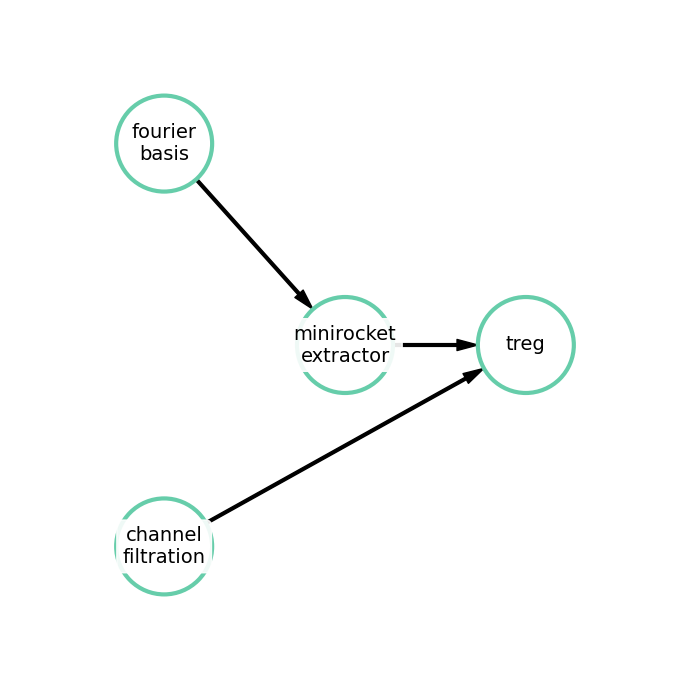

In [6]:
result_dict['industrial_model'].manager.solver.current_pipeline.show()

In [11]:
# opt_hist = result_dict['industrial_model'].vis_optimisation_history(
#         opt_history_path=opt_hist, mode='fitness', return_history=True)
# opt_hist = result_dict['industrial_model'].vis_optimisation_history(
#         opt_history_path=opt_hist,mode='models', return_history=True)

FitnessBox - Visualizing optimization history... It may take some time, depending on the history size.
2024-07-09 15:58:20,154 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-07-09 15:58:20,160 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
default - The figure was saved to "D:\WORK\Repo\Industiral\IndustrialTS\examples\real_world_examples\industrial_examples\economic_analysis\ts_regression\fitness_by_generation.png".


In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
predictions = np.vstack([api_client.test_data[1].flatten(), result_dict['labels'].flatten()]).T

In [10]:
all_prediction = pd.DataFrame(predictions, columns=['target','automl'])

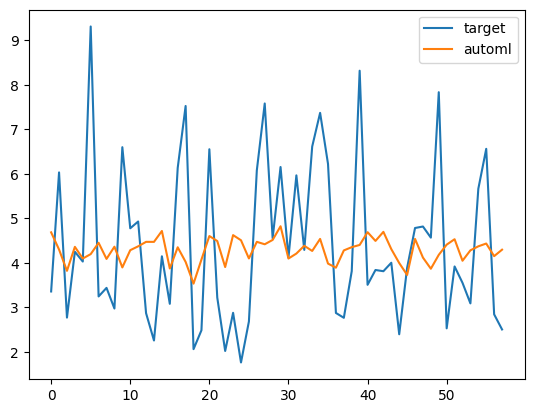

In [11]:
all_prediction.plot()
plt.show()

## Compare with State of Art (SOTA) models

In [12]:
from fedot_ind.tools.serialisation.path_lib import PROJECT_PATH
df = pd.read_csv(PROJECT_PATH + '/benchmark/ts_regression_sota_results.csv', sep=';')
df = df[df['ds/type'] == DATASET_NAME].iloc[:, :25]
df.index = df['algorithm']
df = df.drop(['algorithm', 'ds/type'], axis=1)
df = df.replace(',', '.', regex=True).astype(float)

In [13]:
df['Fedot_Industrial_tuned'] = result_dict['metrics']['rmse'][0]
df = df.T

In [14]:
df.sort_values('min')['min']

FreshPRINCE_RMSE          1.020426
DrCIF_RMSE                1.046399
RotF_RMSE                 1.097089
TSF_RMSE                  1.172730
RandF_RMSE                1.182821
XGBoost_RMSE              1.272832
RIST_RMSE                 1.301506
RDST_RMSE                 1.382981
MultiROCKET_RMSE          1.454406
SingleInception_RMSE      1.490343
InceptionT_RMSE           1.542210
5NN-DTW_RMSE              1.593567
CNN_RMSE                  1.602674
FPCR-Bs_RMSE              1.607024
ResNet_RMSE               1.610736
FCN_RMSE                  1.636335
FPCR_RMSE                 1.637966
Grid-SVR_RMSE             1.699988
Ridge_RMSE                1.713667
Fedot_Industrial_tuned    1.787000
ROCKET_RMSE               1.856612
5NN-ED_RMSE               1.905470
1NN-ED_RMSE               2.129638
1NN-DTW_RMSE              2.211915
Name: min, dtype: float64

In [15]:
df.sort_values('max')['max']

Fedot_Industrial_tuned    1.787000
RIST_RMSE                 1.887153
RotF_RMSE                 2.088333
FreshPRINCE_RMSE          2.101253
MultiROCKET_RMSE          2.137563
TSF_RMSE                  2.181236
RDST_RMSE                 2.200364
DrCIF_RMSE                2.201153
ResNet_RMSE               2.404590
RandF_RMSE                2.446314
5NN-DTW_RMSE              2.502464
XGBoost_RMSE              2.511297
FPCR-Bs_RMSE              2.512605
FPCR_RMSE                 2.523426
5NN-ED_RMSE               2.554152
FCN_RMSE                  2.559661
InceptionT_RMSE           2.574168
SingleInception_RMSE      2.633115
CNN_RMSE                  2.674200
Grid-SVR_RMSE             2.800419
ROCKET_RMSE               2.870444
Ridge_RMSE                2.904762
1NN-ED_RMSE               3.281798
1NN-DTW_RMSE              3.408802
Name: max, dtype: float64

In [16]:
df.sort_values('average')['average']

FreshPRINCE_RMSE          1.490442
RIST_RMSE                 1.501047
RotF_RMSE                 1.559385
DrCIF_RMSE                1.594442
TSF_RMSE                  1.684828
RandF_RMSE                1.708196
XGBoost_RMSE              1.716903
RDST_RMSE                 1.772813
MultiROCKET_RMSE          1.773578
Fedot_Industrial_tuned    1.787000
ResNet_RMSE               1.938074
InceptionT_RMSE           2.030315
FPCR_RMSE                 2.052389
5NN-DTW_RMSE              2.055256
FCN_RMSE                  2.069046
FPCR-Bs_RMSE              2.097964
SingleInception_RMSE      2.149368
CNN_RMSE                  2.150854
Grid-SVR_RMSE             2.203537
5NN-ED_RMSE               2.251424
ROCKET_RMSE               2.275254
Ridge_RMSE                2.363609
1NN-DTW_RMSE              2.742105
1NN-ED_RMSE               2.822595
Name: average, dtype: float64